In [18]:
import numpy as np
from numpy import shape,dot
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 

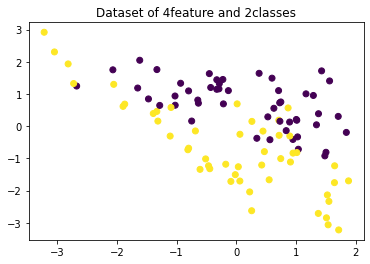

In [3]:
#creating a classification data comprsing of 4features and 2classes
X,y = make_classification(n_features = 4,n_classes=2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('Dataset of 4feature and 2classes')
plt.show()

In [5]:
#Splitting the dataset int train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#Normalizing the Xtrain data
def normalize(X_train):
    for i in range(shape(X_train)[1]):
        X_train[:,i] = (X_train[:,i] - np.mean(X_train[:,i]))/np.std(X_train[:,i])

In [17]:
#Initializing the parameters
def initialize(X):
    weights = np.zeros((shape(X)[1]+1,1))
    X = np.c_[np.ones((shape(X)[0],1)),X]
    return weights,X

In [16]:
#Defiing the sigmoid sunction
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [19]:
##Cal the cost functions i.e getting the errors
def cost(theta):
    z = dot(X,theta)
    cost0 = y.T.dot(np.log(sigmoid(z)))
    cost1 = (1-y).T.dot(np.log(1-sigmoid(z)))
    cost = -((cost1 + cost0))/len(y) 
    return cost

In [26]:
#Cal the gradient function
def fit(X,y,alpha=0.001,iter=100):
    params,X = initialize(X)
    cost_list = np.zeros(iter)
    for i in range(iter):
        y_reshape = np.reshape(y,(len(y),1))
        y_hat = sigmoid(dot(X,params))
        error = y_hat - y_reshape 
        params = params - alpha * dot(X.T,error )
        cost_list[i] = cost(params)
    params = params
    return cost_list

(100, 1)